In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

plt.style.use('bmh')

In [2]:
# Select a subset of columns to use from the README
column_subset = ['FlightDate',
                 'Airline',
                 'Origin',
                 'Dest',
                 'Cancelled',
                 'Diverted',
                 'CRSDepTime',
                 'DepTime',
                 'DepDelayMinutes', 
                 'OriginAirportID',
                 'OriginStateName',
                 'DestAirportID',
                 'DestCityName',
                 'DestStateName',
                ]

# Read in the 2021 data using the columns we selected
file_to_load = 'data/Combined_Flights_2021.parquet'
flights_2021 = pd.read_parquet(file_to_load, columns=column_subset)
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    flights_2021[c] = flights_2021[c].astype("category")
flights_2021.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestAirportID,DestCityName,DestStateName
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,14794,Utah,14107,"Phoenix, AZ",Arizona
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,14107,Arizona,14794,"St. George, UT",Utah
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,13296,New Hampshire,13930,"Chicago, IL",Illinois
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,11298,Texas,15323,"Bristol/Johnson City/Kingsport, TN",Tennessee
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,14107,Arizona,10561,"Bakersfield, CA",California


In [3]:
# Let's see the shape and data types of our data
flights_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311871 entries, 0 to 573778
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   FlightDate       datetime64[ns]
 1   Airline          category      
 2   Origin           category      
 3   Dest             category      
 4   Cancelled        bool          
 5   Diverted         bool          
 6   CRSDepTime       int64         
 7   DepTime          float64       
 8   DepDelayMinutes  float64       
 9   OriginAirportID  int64         
 10  OriginStateName  category      
 11  DestAirportID    int64         
 12  DestCityName     object        
 13  DestStateName    category      
dtypes: bool(2), category(5), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 439.4+ MB


In [4]:
# Now let's see if are there any null values on our data
flights_2021.isnull().sum()

FlightDate              0
Airline                 0
Origin                  0
Dest                    0
Cancelled               0
Diverted                0
CRSDepTime              0
DepTime            108325
DepDelayMinutes    108413
OriginAirportID         0
OriginStateName         0
DestAirportID           0
DestCityName            0
DestStateName           0
dtype: int64

In [5]:
# Let's look at rows where DepTime is null
flights_2021[flights_2021['DepTime'].isnull()].sample(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestAirportID,DestCityName,DestStateName
19218,2021-03-15,SkyWest Airlines Inc.,JMS,DVL,True,False,2244,NaN,NaN,12519,North Dakota,11447,"Devils Lake, ND",North Dakota
85045,2021-02-18,"Commutair Aka Champlain Enterprises, Inc.",IAD,STL,True,False,1730,NaN,NaN,12264,Virginia,15016,"St. Louis, MO",Missouri
279090,2021-07-08,JetBlue Airways,JFK,RDU,True,False,1930,NaN,NaN,12478,New York,14492,"Raleigh/Durham, NC",North Carolina
254589,2021-09-02,United Air Lines Inc.,EWR,CLE,True,False,730,NaN,NaN,11618,New Jersey,11042,"Cleveland, OH",Ohio
537294,2021-12-24,United Air Lines Inc.,LAX,DEN,True,False,1250,NaN,NaN,12892,California,11292,"Denver, CO",Colorado
550364,2021-07-15,Allegiant Air,BWI,TYS,True,False,1717,NaN,NaN,10821,Maryland,15412,"Knoxville, TN",Tennessee
41015,2021-06-13,Southwest Airlines Co.,SDF,MCO,True,False,1845,NaN,NaN,14730,Kentucky,13204,"Orlando, FL",Florida
71064,2021-07-15,Southwest Airlines Co.,MIA,MDW,True,False,545,NaN,NaN,13303,Florida,13232,"Chicago, IL",Illinois
77998,2021-03-14,United Air Lines Inc.,LAS,DEN,True,False,600,NaN,NaN,12889,Nevada,11292,"Denver, CO",Colorado
537272,2021-07-21,Allegiant Air,LAX,FSD,True,False,1631,NaN,NaN,12892,California,11775,"Sioux Falls, SD",South Dakota


## Looks like the DepTime and DepDelayMinutes columns are null when the flight is cancelled. We should keep this in mind and filter out the cancelled flights if necessary.

In [6]:
# Let's take a look at columns where DepDelayMinutes is null and DepTime is not null
flights_2021[(flights_2021['DepDelayMinutes'].isnull()) & (flights_2021['DepTime'].notnull())].sample(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestAirportID,DestCityName,DestStateName
80205,2021-08-27,Allegiant Air,SWF,SFB,True,False,2027,2049.0,NaN,15070,New York,14761,"Sanford, FL",Florida
32932,2021-04-11,Allegiant Air,VPS,EWR,True,False,630,627.0,NaN,15624,Florida,11618,"Newark, NJ",New Jersey
370104,2021-12-24,Allegiant Air,MFR,LAS,True,False,2124,2247.0,NaN,13264,Oregon,12889,"Las Vegas, NV",Nevada
220361,2021-06-18,Allegiant Air,SGF,LAX,True,False,2116,2217.0,NaN,14783,Missouri,12892,"Los Angeles, CA",California
294571,2021-03-26,Allegiant Air,AUS,AVL,True,False,2014,2106.0,NaN,10423,Texas,10431,"Asheville, NC",North Carolina
29630,2021-11-12,Allegiant Air,PIE,PIT,True,False,1643,1708.0,NaN,14112,Florida,14122,"Pittsburgh, PA",Pennsylvania
541103,2021-07-11,Allegiant Air,LAS,SAT,True,False,1417,1544.0,NaN,12889,Nevada,14683,"San Antonio, TX",Texas
227951,2021-10-28,Allegiant Air,USA,FLL,True,False,2044,2302.0,NaN,12544,North Carolina,11697,"Fort Lauderdale, FL",Florida
588490,2021-08-11,Republic Airlines,EWR,SYR,True,False,1930,1930.0,NaN,11618,New Jersey,15096,"Syracuse, NY",New York
84005,2021-08-06,Allegiant Air,PIA,DEN,True,False,1556,1759.0,NaN,14108,Illinois,11292,"Denver, CO",Colorado


## In this case, the same thing is true: when the flight is cancelled, the DepDelayMinutes columns is null. However, here the DepTime column is not null. Maybe is has to do with how close the cancellation was to the scheduled departure time?

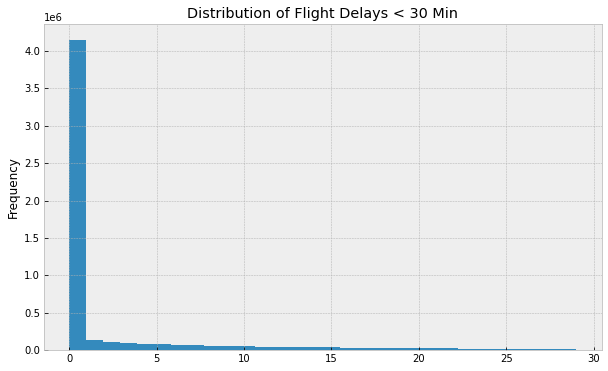

In [7]:
# Let's make a quick graph to see the distribution of DepDelayMinutes that are less than 30 minutes
flights_2021.query('DepDelayMinutes < 30')['DepDelayMinutes'].plot(kind='hist', bins=30, figsize=(10, 6), title='Distribution of Flight Delays < 30 Min')
plt.show()

### We can see that most delays are very close to zero, with a long tail of delays that are much longer. This is probably because most flights are on time, and the long tail is due to the fact that some flights are delayed by a lot.

### Now, let's create some Delay categories based on the following link: https://en.wikipedia.org/wiki/Flight_cancellation_and_delay
> Delays are divided into three categories, namely "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" ( 45 minutes delay).

In [8]:
# Create the new columns based on the Delay categories
flights_2021["OnTime"] = flights_2021["DepDelayMinutes"] == 0
flights_2021["SmallDelay"] = (flights_2021["DepDelayMinutes"] > 0) & (flights_2021["DepDelayMinutes"] <= 15)
flights_2021["MediumDelay"] = (flights_2021["DepDelayMinutes"] > 15) & (flights_2021["DepDelayMinutes"] <= 45)
flights_2021["LargeDelay"] = flights_2021["DepDelayMinutes"] > 45

# If the flight was cancelled, then is not on time
flights_2021.loc[flights_2021["Cancelled"], "OnTime"] = False
flights_2021.loc[flights_2021["Cancelled"], "SmallDelay"] = False
flights_2021.loc[flights_2021["Cancelled"], "MediumDelay"] = False
flights_2021.loc[flights_2021["Cancelled"], "LargeDelay"] = False

# Turn into a single categorical column
flights_2021['Status'] = flights_2021[['OnTime', 'SmallDelay', 'MediumDelay', 'LargeDelay', 'Cancelled']].idxmax(1).astype('category')

# Lets take a look at the new dataframe
flights_2021.sample(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginStateName,DestAirportID,DestCityName,DestStateName,OnTime,SmallDelay,MediumDelay,LargeDelay,Status
487145,2021-10-27,SkyWest Airlines Inc.,ORD,JLN,False,False,850,849.0,0.0,13930,Illinois,12511,"Joplin, MO",Missouri,True,False,False,False,OnTime
266625,2021-04-02,American Airlines Inc.,ELP,DFW,False,False,1440,1436.0,0.0,11540,Texas,11298,"Dallas/Fort Worth, TX",Texas,True,False,False,False,OnTime
86724,2021-01-02,Delta Air Lines Inc.,SLC,LAX,False,False,2059,2053.0,0.0,14869,Utah,12892,"Los Angeles, CA",California,True,False,False,False,OnTime
436369,2021-11-13,Alaska Airlines Inc.,SEA,BNA,False,False,1027,1038.0,11.0,14747,Washington,10693,"Nashville, TN",Tennessee,False,True,False,False,SmallDelay
214695,2021-06-21,Frontier Airlines Inc.,DEN,SLC,False,False,1345,1339.0,0.0,11292,Colorado,14869,"Salt Lake City, UT",Utah,True,False,False,False,OnTime
268764,2021-07-13,Alaska Airlines Inc.,SEA,SFO,False,False,605,600.0,0.0,14747,Washington,14771,"San Francisco, CA",California,True,False,False,False,OnTime
258204,2021-12-20,Alaska Airlines Inc.,JFK,SAN,False,False,930,926.0,0.0,12478,New York,14679,"San Diego, CA",California,True,False,False,False,OnTime
362165,2021-06-18,American Airlines Inc.,PHL,CLT,False,False,1920,2039.0,79.0,14100,Pennsylvania,11057,"Charlotte, NC",North Carolina,False,False,False,True,LargeDelay
305436,2021-10-05,Southwest Airlines Co.,BNA,HOU,False,False,555,552.0,0.0,10693,Tennessee,12191,"Houston, TX",Texas,True,False,False,False,OnTime
373880,2021-09-17,Capital Cargo International,MDT,PHL,False,False,645,640.0,0.0,13230,Pennsylvania,14100,"Philadelphia, PA",Pennsylvania,True,False,False,False,OnTime


### Flight Cancellation Aggregates by Month

In [9]:
flights_2021['Month'] = flights_2021['FlightDate'].dt.month
months_2021 = flights_2021.groupby('Month')['Status'].value_counts(normalize=True).unstack()
months_2021.style.background_gradient(axis=0)

,Cancelled,LargeDelay,MediumDelay,OnTime,SmallDelay
Month,,,,,
1,0.010952,0.037484,0.043652,0.815672,0.092239
2,0.057689,0.049610,0.058206,0.719842,0.114653
3,0.012639,0.039045,0.055867,0.765963,0.126486
4,0.005404,0.042485,0.058430,0.759906,0.133775
5,0.004519,0.056736,0.072805,0.706966,0.158974
6,0.016027,0.113582,0.116087,0.569782,0.184522
7,0.016558,0.118315,0.121242,0.551180,0.192705
8,0.030636,0.104204,0.111352,0.579239,0.174569
9,0.013692,0.059282,0.077381,0.696753,0.152892


<AxesSubplot:title={'center':'Distribution of Flights by Airline'}>

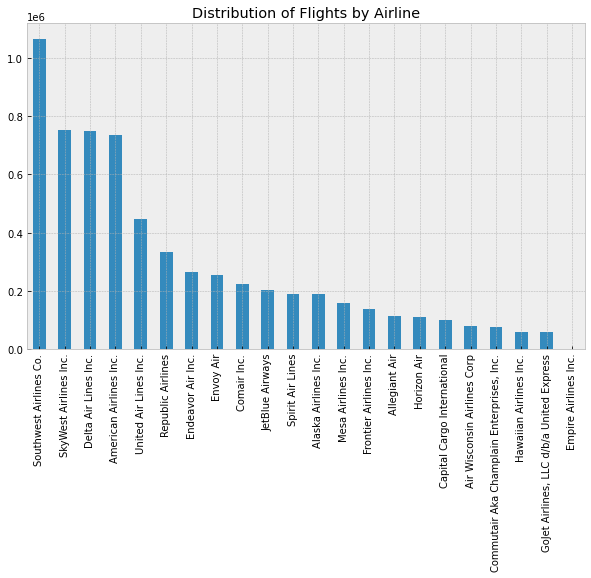

In [10]:
# Let's look at the distribution of flights by airline
flights_2021['Airline'].value_counts().plot(kind='bar', figsize=(10, 6), title='Distribution of Flights by Airline')

In [11]:
# Aggregate and compute each airline by the number of cancelled and diverted flights
each_status = flights_2021.groupby('Airline')[['Cancelled', 'Diverted']].sum().sort_values(by='Cancelled', ascending=False)
total_flights = flights_2021.groupby('Airline')['Status'].count()
each_status['Total'] = total_flights
each_status.style.background_gradient(axis=0)


,Cancelled,Diverted,Total
Airline,,,
Southwest Airlines Co.,23505,2375,1064640
American Airlines Inc.,16478,2090,736399
SkyWest Airlines Inc.,13323,2134,753343
United Air Lines Inc.,6107,1076,446837
Envoy Air,5686,666,255751
Spirit Air Lines,5661,414,191361
Republic Airlines,5647,749,332926
Mesa Airlines Inc.,4763,471,159789
Allegiant Air,3829,250,115881


In [12]:
# Aggregate and compute each status type by airline and order by the total number of flights
each_type = flights_2021.groupby('Airline')['Status'].value_counts(normalize=True).unstack()
total_flights = flights_2021.groupby('Airline')['Status'].count()
each_type['Total'] = total_flights
each_type.sort_values('Total', ascending=False, inplace=True)
each_type.style.background_gradient(axis=0)


,Cancelled,LargeDelay,MediumDelay,OnTime,SmallDelay,Total
Airline,,,,,,
Southwest Airlines Co.,0.022078,0.090852,0.161197,0.454797,0.271076,1064640
SkyWest Airlines Inc.,0.017685,0.076030,0.062200,0.737051,0.107034,753343
Delta Air Lines Inc.,0.004854,0.045691,0.065989,0.714824,0.168641,747998
American Airlines Inc.,0.022376,0.083669,0.086998,0.641693,0.165264,736399
United Air Lines Inc.,0.013667,0.070422,0.087546,0.632801,0.195563,446837
Republic Airlines,0.016962,0.058430,0.053826,0.784946,0.085836,332926
Endeavor Air Inc.,0.003650,0.038304,0.037981,0.844822,0.075243,266867
Envoy Air,0.022233,0.060375,0.069087,0.726597,0.121708,255751
Comair Inc.,0.010126,0.063441,0.059802,0.756673,0.109959,222602


### In the above graph, we can see that Southwest Airlines Co. has the least amount of OnTime flights. They also have the highest of cancellations. Also, JetBlue Airways has the highest amount of LargeDelays and a medium level of Cancellations.

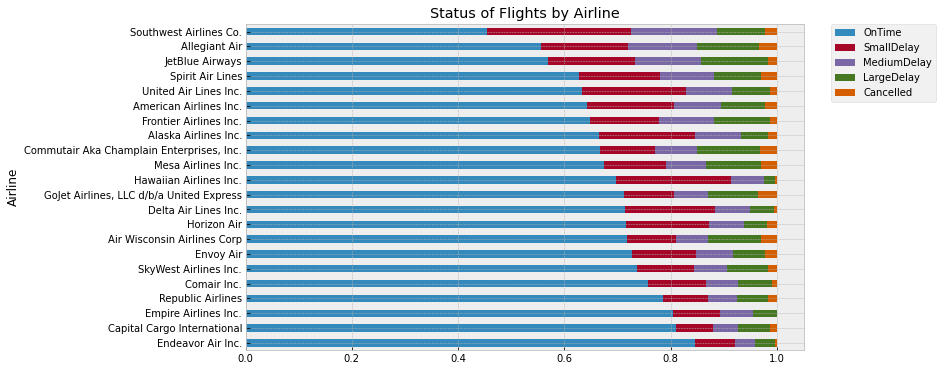

In [13]:
# Let's make a horizontal stacked bar graph to see the status of flights by airline
each_type[['OnTime', 'SmallDelay', 'MediumDelay', 'LargeDelay','Cancelled']].sort_values(by='OnTime',ascending=False).plot(kind='barh', stacked=True, figsize=(10, 6), title='Status of Flights by Airline')
# Move the legend to the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [14]:
# Lets create an interactive plot using calplot to see the distribution of cancelled flights by date
from plotly_calplot import calplot

cancelled_flights = flights_2021.groupby("FlightDate")["Cancelled"].mean()
fig = calplot(cancelled_flights.apply(np.log).reset_index(), x="FlightDate", y="Cancelled", colorscale="blues",
               years_title=True, month_lines_width=1, month_lines_color="black")
fig.show()

In [15]:
# Let's do the same but looking at Southwest Airlines Co.
southwest = flights_2021.query('Airline == "Southwest Airlines Co."')
southwest_cancelled = southwest.groupby("FlightDate")["Cancelled"].mean()
fig = calplot(southwest_cancelled.apply(np.log).reset_index(), x="FlightDate", y="Cancelled", colorscale="blues",
              years_title=True, month_lines_width=1, month_lines_color="black", title="Southwest Airlines Co. Cancelled Flights") 
fig.show()

In [16]:
# Create a function that does the above for all airlines in the dataframe
def create_heatmap(df, airline):
    airline_df = df.query(f'Airline == "{airline}"')
    cancelled_flights = airline_df.groupby("FlightDate")["Cancelled"].mean()
    fig = calplot(cancelled_flights.apply(np.log).reset_index(), x="FlightDate", y="Cancelled", colorscale="blues",
                  years_title=True, month_lines_width=1, month_lines_color="black", title=f"{airline} Cancelled Flights",
                  name=f"{airline}")
    return fig.show()


create_heatmap(flights_2021, "United Air Lines Inc.")

In [17]:
# Create a for loop in order to create a heatmap for each airline
list_of_airlines = flights_2021['Airline'].unique()
for i in list_of_airlines:
    create_heatmap(flights_2021, i)

In [23]:
flights_2021.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'OriginAirportID',
       'OriginStateName', 'DestAirportID', 'DestCityName', 'DestStateName',
       'OnTime', 'SmallDelay', 'MediumDelay', 'LargeDelay', 'Status', 'Month'],
      dtype='object')

In [50]:
# Aggregate and compute each status origin state and order by the total number of flights
each_type_origin = flights_2021.groupby('OriginStateName')['Status'].value_counts(normalize=True).unstack()
total_flights_origin = flights_2021.groupby('OriginStateName')['Status'].count()
each_type_origin['Total'] = total_flights_origin
each_type_origin.sort_values('Total', ascending=False, inplace=True)
each_type_origin.style.background_gradient(axis=0)


,Cancelled,LargeDelay,MediumDelay,OnTime,SmallDelay,Total
OriginStateName,,,,,,
Texas,0.028063,0.094815,0.109165,0.590218,0.177739,699255
California,0.014394,0.066513,0.089044,0.652816,0.177233,592112
Florida,0.017434,0.089414,0.101724,0.626297,0.165131,568815
Illinois,0.021603,0.087904,0.099798,0.619902,0.170793,366479
Georgia,0.007091,0.051071,0.084840,0.686494,0.170505,341017
North Carolina,0.012583,0.061257,0.064161,0.732561,0.129439,309614
Colorado,0.023320,0.096463,0.124201,0.543071,0.212946,306181
New York,0.015849,0.077627,0.076168,0.698102,0.132254,240522
Virginia,0.016271,0.071182,0.069684,0.713085,0.129778,212286


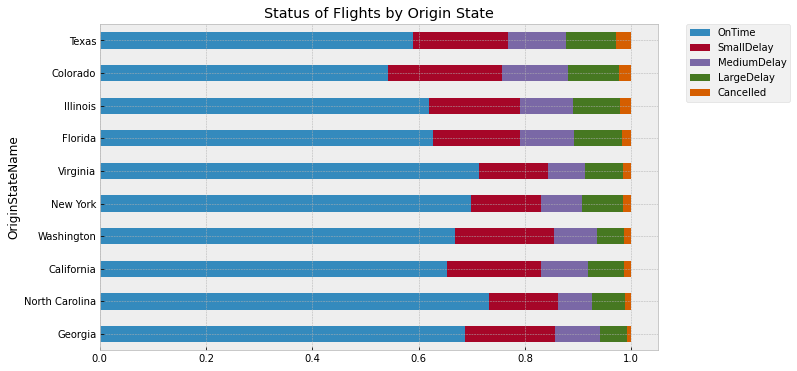

In [51]:
# Let's make a horizontal stacked bar graph to see the status of flights by origin state
each_type_origin[['OnTime', 'SmallDelay', 'MediumDelay', 'LargeDelay','Cancelled']].head(10).sort_values(by='Cancelled',ascending=True).plot(kind='barh', stacked=True, figsize=(10, 6), title='Status of Flights by Origin State')
# Move the legend to the right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()